# Assignement 4

In [5]:
%pip install pyod

     ---------------------------------------- 0.0/165.8 kB ? eta -:--:--
     ---- -------------------------------- 20.5/165.8 kB 640.0 kB/s eta 0:00:01
     ----------------------- -------------- 102.4/165.8 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 165.8/165.8 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   -- ------------------------------------- 0.1/2.7 MB 4.3 MB/s eta 0:00:01
   ------- -------------------------------- 0.5/2.7 MB 5.9 MB/s eta 0:00:01
   ---------- ----------------------------- 0.7/2.7 MB 5.5 MB/s eta 0:00:01
   --------------- ------------------------ 1.0/2.7 MB 6.0 MB/s eta 0:00:01
   ----------------- ---------------------- 1.2/2.7 MB 5.4 MB/s eta 0:00:01
   ------------------- -------------------- 1.3/2.7 MB 4.9 MB/s eta 0:00:01
   ------------------------- -------------- 1.7/2.7 MB 5.5 M

## Imports and installs

In [2]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import preprocessing
import matplotlib.pyplot as plt 

## Task 0, warmup

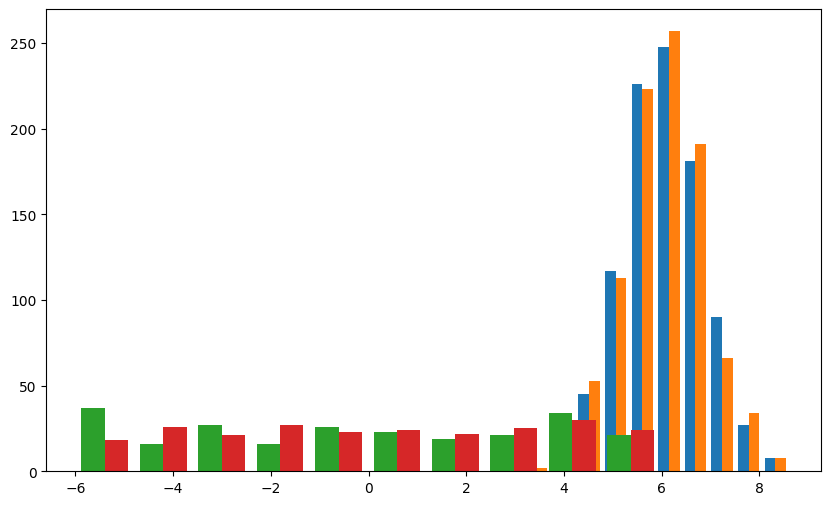

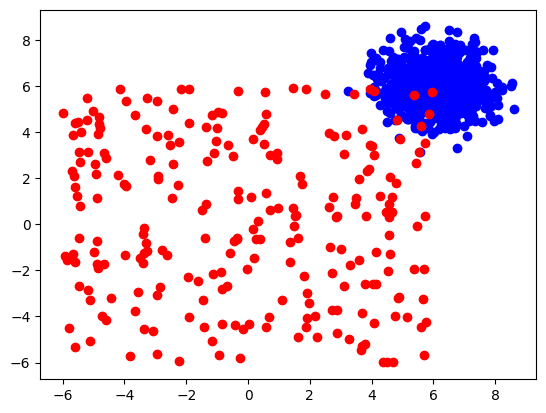

In [3]:
dataframe = pd.read_csv("./data/anomaly_data.csv", delimiter=",")
#display(dataframe)
X, y = dataframe.iloc[:, 1:3], dataframe.iloc[:, -1]
#display(X)
plt.figure(figsize = (10, 6))

plt.hist(X[y==0])
plt.hist(X[y == 1])
plt.show()
plt.scatter(X[y==0].iloc[:, 0], X[y==0].iloc[:, 1], c = 'b')
plt.scatter(X[y==1].iloc[:, 0], X[y==1].iloc[:, 1], c = 'r')
plt.show()

## Task 1: KNN  detection

In [26]:
from pyod.models.knn import KNN 
from sklearn.model_selection import train_test_split  
from sklearn.metrics import roc_auc_score, average_precision_score 
from pyod.utils.example import visualize

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=0)


0.9980133462380928
0.9928058217036719


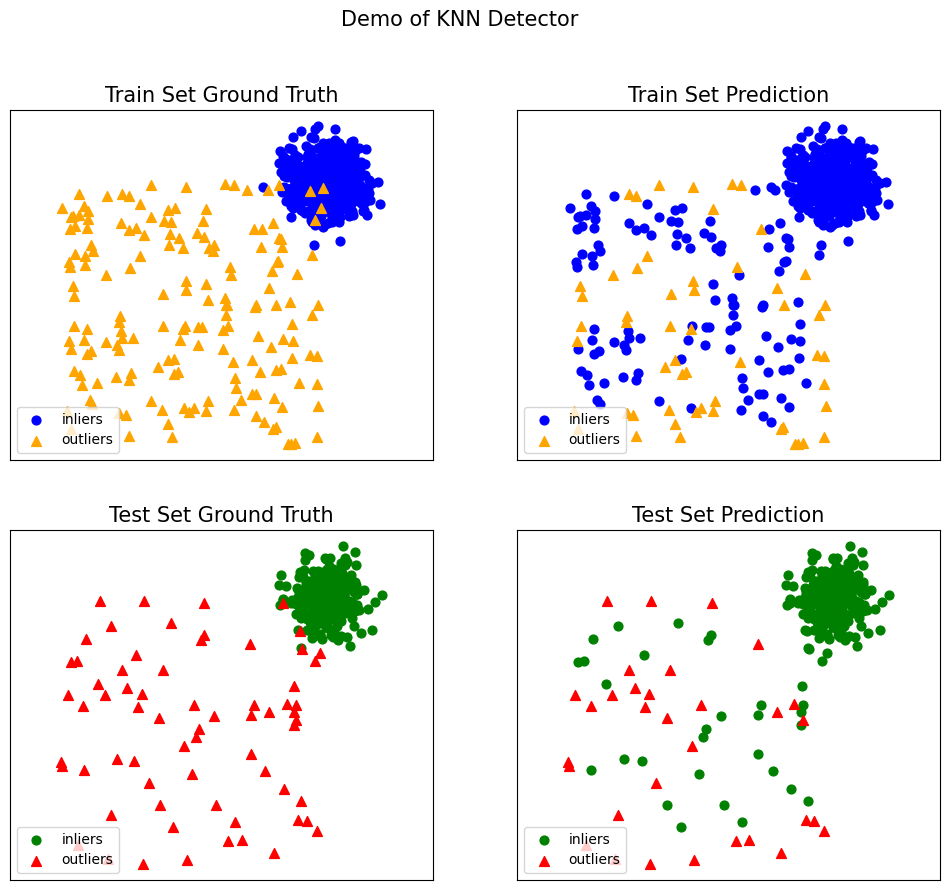

In [33]:
clf = KNN(n_neighbors=10, method="largest", metric="euclidean")
clf.fit(X_train)
y_test_scores = clf.decision_function(X_test)  # outlier scores
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
print(roc_auc_score(y_test, y_test_scores))
print(average_precision_score(y_test, y_test_scores))
visualize("KNN", X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)